# Wykres DFT przy użyciu numpy.fft

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [103]:
# plt.style.use('Solarize_Light2')
plt.style.use('classic')

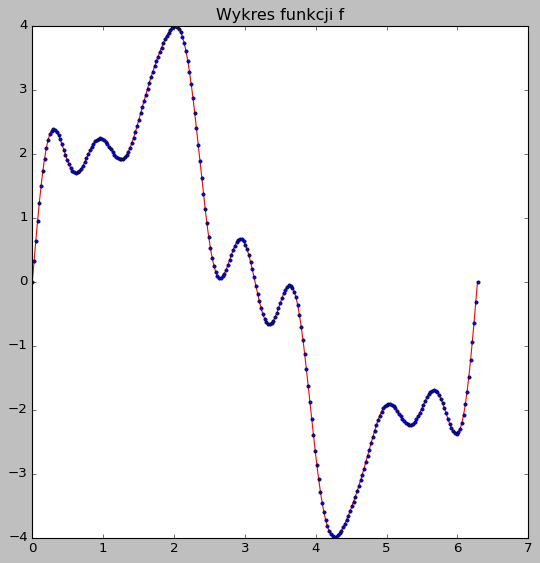

In [104]:
def samples(f, samplingRate):
    x = np.linspace(0, 2*np.pi, samplingRate)
    a = f(x)
    return (a, x)

# pary (częstotliwość, mnożnik)
sineComponents = [ (1, 3), (4, 1), (7, 0.5), (9, 0.3) ]

def f(t):
    value = 0
    for (freq, mul) in sineComponents:
        value += mul*np.sin(freq*t)
    return value

a, x = samples(f, 256)
aDraw, xDraw = samples(f, 2048)

plt.figure(figsize = (8, 8))
plt.title("Wykres funkcji f")
plt.plot(xDraw, aDraw, 'r')
plt.plot(x, a, 'o', markersize=3)

plt.show()

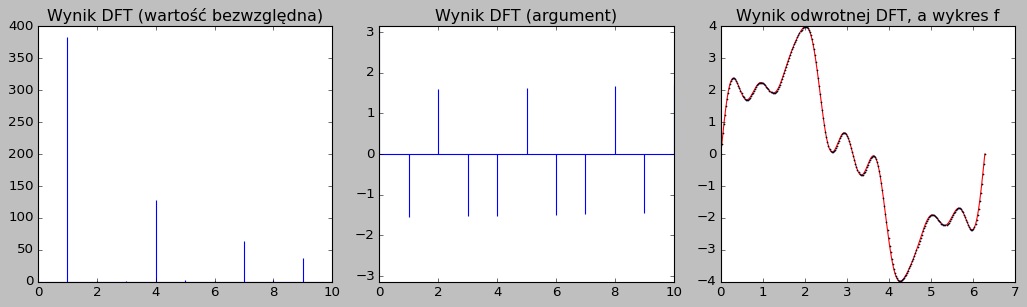

In [105]:
A = np.fft.fft(a)
freq = np.arange(len(a))

plt.figure(figsize = (13, 4))

plt.subplot(131)
plt.title("Wynik DFT (wartość bezwzględna)")
plt.stem(freq, np.abs(A), markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.subplot(132)
plt.title("Wynik DFT (argument)")
plt.stem(freq, np.angle(A), markerfmt=" ", basefmt="-b")
plt.ylim(-np.pi, np.pi)
plt.xlim(0, 10)

plt.subplot(133)
plt.title("Wynik odwrotnej DFT, a wykres f")
plt.plot(xDraw, aDraw, 'r')
plt.plot(x, np.real(np.fft.ifft(A)), 'o', markersize=1)

plt.tight_layout()
plt.show()

# Implementacja FFT (Cooley-Tukey)

In [106]:
def fft(a):
    
    if(len(a) == 1):
        return np.array(a)
    
    even = a[::2]
    odd = a[1::2]
    E = fft(even)
    O = fft(odd)
    
    dft1 = E  + np.exp(-2*np.pi*1j/len(a)*np.arange(len(a)/2)) * O
    dft2 = E - np.exp(-2*np.pi*1j/len(a)*np.arange(len(a)/2)) * O

    return np.concatenate( (dft1, dft2) )

In [3]:
def swapImRe(x):
    return np.imag(x) + 1j*np.real(x)

def ifft(A):
    a = swapImRe(A)
    a = fft(a)
    a = swapImRe(a)
    a /= len(a)
    return a

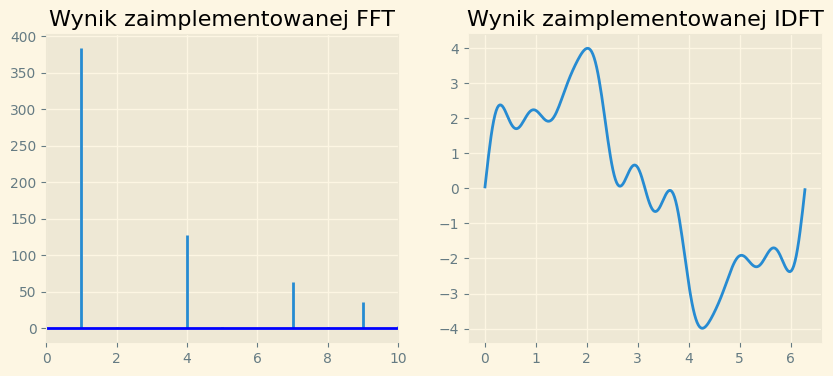

In [10]:
A = fft(a)

plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.title("Wynik zaimplementowanej FFT")
plt.stem(freq, np.abs(A), markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.subplot(122)
plt.title("Wynik zaimplementowanej IDFT")
plt.plot(x, ifft(A))

plt.show()

# Porównanie z obliczaniem z definicji

In [11]:
def dft(a):
    omega = np.exp(1j* 2* np.pi / len(a))
    return [ np.sum(a * omega**(-k * np.arange(len(a)) )) for k in np.arange(len(a))]

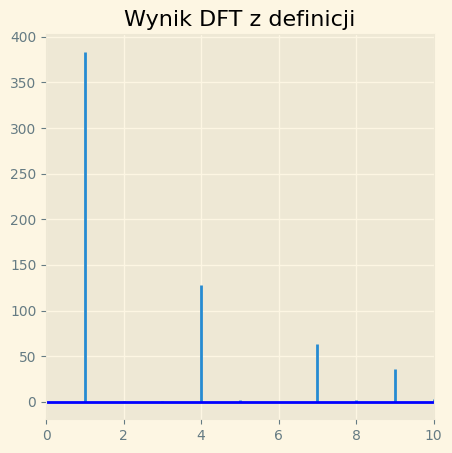

In [12]:
A = dft(a)

plt.figure(figsize = (5, 5))
plt.title("Wynik DFT z definicji")
plt.stem(freq, np.abs(A), markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.show()

In [9]:
a, x = samples(f, 2048)

start = time.process_time()
fft(a)
end = time.process_time()
print("FFT:", end-start, "sekundy")

start = time.process_time()
dft(a)
end = time.process_time()
print("Z definicji:", end-start, "sekundy")

FFT: 0.08540175400000027 sekundy
Z definicji: 2.6345312309999995 sekundy


# Wielowymiarowa FFT

In [146]:
def grating(canvasSize, wavelength, angle, phase, amplitude):
    x = np.arange(canvasSize)
    X, Y = np.meshgrid(x, x)
    g = np.sin( phase + 2*np.pi * (X*np.cos(angle) + Y*np.sin(angle)) / wavelength )
    return g

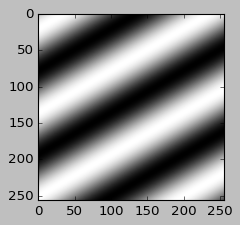

In [147]:
a = grating(256, 100, np.pi/3, 0.5, 1)
plt.figure(figsize=[3,3])
plt.set_cmap("gray")
plt.imshow(a)
plt.show()

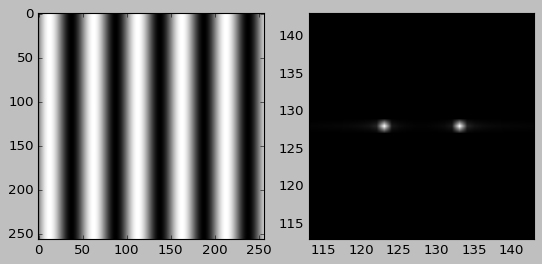

In [148]:
canvasSize = 256
a = grating(canvasSize, 50, 0, 0, 1)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(a)

A = np.fft.ifftshift(a)
A = np.fft.fft2(A)
A = np.fft.fftshift(A)

plt.subplot(122)
plt.imshow(np.abs(A))

offset = 15
plt.xlim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.ylim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.show()

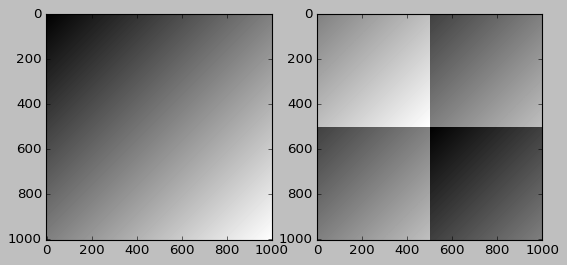

In [149]:
# sprawdzenie FFT shift

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
gradient = Y+X

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(gradient)

plt.subplot(122)
plt.imshow(np.fft.fftshift(gradient))

plt.show()

# Implementacja 2D FFT

In [150]:
def row_columnFFT(a):
    
    A = np.array(a, dtype=np.complex128)
    for i in range(len(A)):
        row = A[i]
        A[i] = fft(row)

    A = A.T
    for i in range(len(A)):
        col = A[i]
        A[i] = fft(col)
    A = A.T
    return A

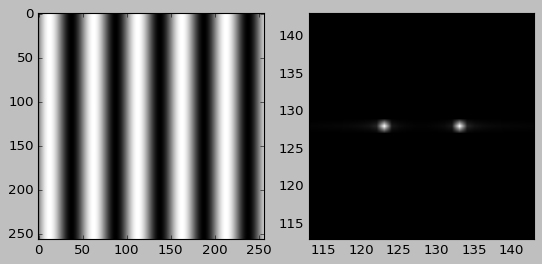

In [153]:
a = grating(canvasSize, 50, 0, 0, 1)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(a)

A = np.fft.ifftshift(a)
A = row_columnFFT(A)
A = np.fft.fftshift(A)

plt.subplot(122)
plt.imshow(np.abs(A))

offset = 15
plt.xlim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.ylim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.show()

In [154]:
def omega(N):
    return np.exp(2*np.pi*1j / N)

def vector_radixFFT(a):

    if a.shape == (1,1):
        return a
    
    N1 = a.shape[0]
    N2 = a.shape[1]
    halfN1 = int(N1/2)
    halfN2 = int(N2/2)

    ee = a[::2, ::2].astype(np.complex128)
    oe = a[1::2, ::2].astype(np.complex128)
    eo = a[::2, 1::2].astype(np.complex128)
    oo = a[1::2, 1::2].astype(np.complex128)
    partDFT = np.array([ [ee, eo], [oe, oo] ])

    for i in range(2):
        for j in range(2):
            partDFT[i][j] = vector_radixFFT(partDFT[i][j])

    u1 = np.arange(halfN1, dtype=np.complex128).reshape(halfN1, 1)
    u2 = np.arange(halfN2, dtype=np.complex128).reshape(1, halfN2)

    partDFT[0][1] = partDFT[0][1] * omega(N2)**u2
    partDFT[1][0] = partDFT[1][0] * omega(N1)**u1 
    partDFT[1][1] = partDFT[1][1] * omega(N1)**u1*omega(N2)**u2

    DFT = np.empty((N1, N2), dtype=np.complex128)

    DFT[ 0:halfN1, 0:halfN2 ] =  partDFT[0][0] + partDFT[0][1] + partDFT[1][0] + partDFT[1][1]
    DFT[ halfN1:2*halfN1, 0:halfN2] = partDFT[0][0] + partDFT[0][1] - partDFT[1][0] - partDFT[1][1]
    DFT[ 0:halfN1, halfN2:2*halfN2] = partDFT[0][0] - partDFT[0][1] + partDFT[1][0] - partDFT[1][1]
    DFT[ halfN1:2*halfN1, halfN2:2*halfN2] = partDFT[0][0] - partDFT[0][1] - partDFT[1][0] + partDFT[1][1]

    return DFT

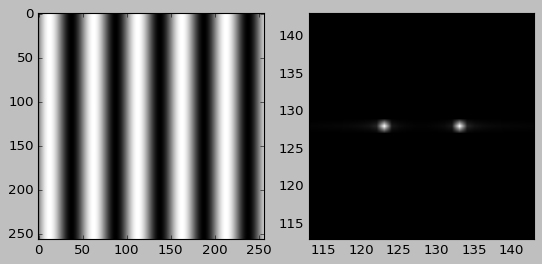

In [156]:
a = grating(canvasSize, 50, 0, 0, 1)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(a)

A = np.fft.ifftshift(a)
A = vector_radixFFT(A)
A = np.fft.fftshift(A)

plt.subplot(122)
plt.imshow(np.abs(A))

offset = 15
plt.xlim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.ylim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.show()

## Porównanie czasów metod obliczania 2D FFT

In [159]:
a = grating(2**10, 50, 0, 0, 1)

start = time.process_time()
row_columnFFT(a)
end = time.process_time()
print("Row-column:", end-start, "sekundy")

start = time.process_time()
vector_radixFFT(a)
end = time.process_time()
print("Vector-radix:", end-start, "sekundy")

Row-column: 67.76337790899998 sekundy
Vector-radix: 47.785187925 sekundy
